In [2]:
# Mounting Google Drive in Colab
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Loading Packages**

In [3]:
!pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
!pip install xgboost

In [5]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 985.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 1.5 MB/s 

In [6]:
# Data Manipulation and Visualization
import numpy as np, os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Embedding, Dropout

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,\
                            precision_score, recall_score, f1_score, roc_auc_score, \
                            mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc as calculate_auc

# Other
import pickle
import gradio as gr

# Set Seeds and Style
tf.random.set_seed(42)
sns.set(style="darkgrid")

# **Data Structure and Content**

We utilized clinical data of ICU patients from two distinct hospital systems made available by PhysioNet. Data were collected from 40,336 patients across both hospitals

## Load the MIMIC dataset

In [ ]:
import pandas as pd
import os

# Directories containing PSV files
directory_A = '/content/gdrive/MyDrive/.../MIMIC_Dataset_A'
directory_B = '/content/gdrive/MyDrive/.../MIMIC_Dataset_B'

# Function to read PSV files from a directory
def read_psv_files(directory):
    dfs = []
    for filename in os.listdir(directory):
        if filename.endswith(".psv"):
            df = pd.read_csv(os.path.join(directory, filename), sep='|')
            # Add a column for Patient_ID
            df['Patient_ID'] = filename[:-4]
            dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Read PSV files from both directories
df_A = read_psv_files(directory_A)
df_B = read_psv_files(directory_B)

# Combine data from both directories into one DataFrame
combined_df = pd.concat([df_A, df_B], ignore_index=True)

# Print the combined DataFrame
print(combined_df)


            HR  O2Sat   Temp    SBP   MAP   DBP  Resp  EtCO2  BaseExcess  \
0         60.0  100.0  37.35  121.5  66.5  43.5  14.0    NaN        -1.0   
1        112.5   99.0  37.55  108.0  67.0  51.0  12.0    NaN         NaN   
2         99.0  100.0  37.70  130.5  81.0  63.0  16.0    NaN         NaN   
3         80.0  100.0  37.70  142.0  81.5  56.5  22.5    NaN         NaN   
4         80.0   98.0  37.90  155.0  88.0  63.0  29.0    NaN         1.0   
...        ...    ...    ...    ...   ...   ...   ...    ...         ...   
1544505   79.0   97.0    NaN  113.0  77.0  64.0  18.0    NaN         NaN   
1544506   83.0   96.0    NaN  105.0  72.0  65.0  18.0    NaN         NaN   
1544507    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN         NaN   
1544508    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN         NaN   
1544509    NaN    NaN    NaN    NaN   NaN   NaN   NaN    NaN         NaN   

         HCO3  ...  Fibrinogen  Platelets    Age  Gender  Unit1  Unit2  \
0         NaN

In [ ]:
# Saving the data to a CSV file to facilitate access
combined_df.to_csv('/content/gdrive/MyDrive/.../MIMIC_Dataset_with_PatientID.csv', index=False)

## Read CSV Instead

In [7]:
# Read MIMIC Dataset
combined_df = pd.read_csv('/content/gdrive/MyDrive/.../MIMIC_Dataset_with_PatientID.csv')

In [8]:
combined_df.shape

(1544510, 42)

In [9]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544510 entries, 0 to 1544509
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HR                1391896 non-null  float64
 1   O2Sat             1342849 non-null  float64
 2   Temp              522662 non-null   float64
 3   SBP               1319555 non-null  float64
 4   MAP               1352214 non-null  float64
 5   DBP               1061587 non-null  float64
 6   Resp              1307069 non-null  float64
 7   EtCO2             57636 non-null    float64
 8   BaseExcess        83317 non-null    float64
 9   HCO3              64405 non-null    float64
 10  FiO2              128298 non-null   float64
 11  pH                106675 non-null   float64
 12  PaCO2             85613 non-null    float64
 13  SaO2              53224 non-null    float64
 14  AST               25080 non-null    float64
 15  BUN               105931 non-null   float64
 16  

In [10]:
combined_df.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                 float64
Gender              

In [11]:
combined_df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,60.0,100.0,37.35,121.5,66.5,43.5,14.0,NaN,-1.0,NaN,...,NaN,69.0,81.12,1,0.0,1.0,-42.55,4,0,p019278
1,112.5,99.0,37.55,108.0,67.0,51.0,12.0,NaN,NaN,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,5,0,p019278
2,99.0,100.0,37.70,130.5,81.0,63.0,16.0,NaN,NaN,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,6,0,p019278
3,80.0,100.0,37.70,142.0,81.5,56.5,22.5,NaN,NaN,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,7,0,p019278
4,80.0,98.0,37.90,155.0,88.0,63.0,29.0,NaN,1.0,NaN,...,NaN,NaN,81.12,1,0.0,1.0,-42.55,8,0,p019278


# **Data Preprocessing**

In [12]:
data = combined_df.copy()

Dropped ID columns of hospitals

In [13]:
data.drop(columns=['Unit1','Unit2'], inplace=True)

## Cleaning Data

### Missing Values

In [14]:
null_values = (data.isnull().sum() / len(data)) * 100
null_values = null_values.sort_values(ascending=False)
null_values

Bilirubin_direct    99.807512
Fibrinogen          99.343157
TroponinI           99.043839
Bilirubin_total     98.507488
Alkalinephos        98.391917
AST                 98.376184
Lactate             97.337861
PTT                 97.067873
SaO2                96.553988
EtCO2               96.268331
Phosphate           95.991609
HCO3                95.830069
Chloride            95.478954
BaseExcess          94.605603
PaCO2               94.456948
Calcium             94.111725
Platelets           94.064525
Creatinine          93.907971
Magnesium           93.696901
WBC                 93.599718
BUN                 93.141449
pH                  93.093279
Hgb                 92.626270
FiO2                91.693288
Hct                 91.163217
Potassium           90.698344
Glucose             82.872432
Temp                66.160012
DBP                 31.267069
Resp                15.373225
SBP                 14.564813
O2Sat               13.056633
MAP                 12.450292
HR        

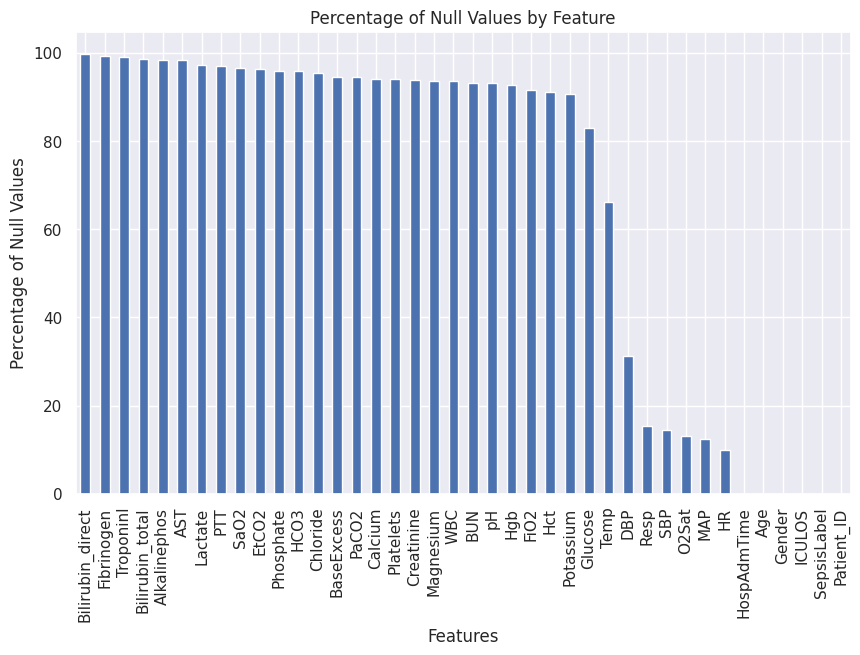

In [15]:
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar')
plt.title('Percentage of Null Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Null Values')
plt.show()

We've observed that the majority of columns contain over 90% missing data. There are various approaches to address this issue. To set a solid foundation, I've opted to eliminate features with 90% or more missing data.

In [16]:
# Drop columns with null values exceeding 90%
columns_to_drop = null_values[null_values > 90].index
data = data.drop(columns=columns_to_drop)

In [17]:
data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Glucose', 'Age',
       'Gender', 'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_ID'],
      dtype='object')

I grouped the data by patient ID, then I employed interpolation techniques followed by backward and forward filling to effectively impute missing values. Any remaining missing values were then dropped from the dataset

In [18]:
grouped_by_patient = data.groupby('Patient_ID')
data = grouped_by_patient.apply(lambda x: x.interpolate(method='linear', axis=0).bfill().ffill())

In [19]:
null_values = (data.isnull().sum() / len(data)) * 100
null_values = null_values.sort_values(ascending=False)
null_values

DBP            16.644373
Glucose         2.714777
SBP             0.708380
Temp            0.474260
MAP             0.174683
Resp            0.129426
O2Sat           0.024215
HR              0.009194
HospAdmTime     0.000518
Age             0.000000
Gender          0.000000
ICULOS          0.000000
SepsisLabel     0.000000
Patient_ID      0.000000
dtype: float64

In [20]:
data.dropna(inplace=True)

In [21]:
null_values = (data.isnull().sum() / len(data)) * 100
null_values = null_values.sort_values(ascending=False)
null_values

HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
MAP            0.0
DBP            0.0
Resp           0.0
Glucose        0.0
Age            0.0
Gender         0.0
HospAdmTime    0.0
ICULOS         0.0
SepsisLabel    0.0
Patient_ID     0.0
dtype: float64

In [23]:
data

HR  O2Sat    Temp    SBP   MAP   DBP  Resp  Glucose  \
Patient_ID                                                                 
p000002    777772  61.0   99.0  36.440  124.0  65.0  43.0  17.5     78.0   
           777773  61.0   99.0  36.440  124.0  65.0  43.0  17.5     78.0   
           777774  64.0   98.0  36.385  125.0  64.0  41.0  27.0     78.0   
           777775  56.0  100.0  36.330  123.0  65.0  41.0   9.0     78.0   
           777776  66.0   99.0  36.275  120.0  67.0  43.0  23.0     78.0   
...                 ...    ...     ...    ...   ...   ...   ...      ...   
p120000    819058  80.0   96.0  36.450  115.0  87.0  65.0  15.0    240.2   
           819059  74.0   97.0  36.500  114.0  83.0  67.0  15.0    240.8   
           819060  78.0   98.0  36.550  110.0  83.0  69.0  15.0    241.4   
           819061  82.0   99.0  36.600  124.0  91.0  71.0  16.0    242.0   
           819062  80.0   97.0  36.600  121.0  97.0  73.0  15.0    242.0   

                     Age  Gender  HospAdmTime  ICULOS  SepsisLabel Patient_ID  
Patient_ID                                                                     
p000002    777772  75.91       0        -98.6       1            0    p000002  
           777773  75.91       0        -98.6       2            0    p000002  
           777774  75.91       0        -98.6       3            0    p000002  
           777775  75.91       0        -98.6       4            0    p000002  
           777776  75.91       0        -98.6       5            0    p000002  
...                  ...     ...          ...     ...          ...        ...  
p120000    819058  62.00       0          0.0      31            0    p120000  
           819059  62.00       0          0.0      32            0    p120000  
           819060  62.00       0          0.0      33            0    p120000  
           819061  62.00       0          0.0      34            0    p120000  
           819062  62.00       0          0.0      35            0    p120000  

[1241835 rows x 14 columns]

### Duplicate Rows

We also dropped the duplicate rows

In [ ]:
data.drop(columns=['Patient_ID'], inplace=True)

In [ ]:
data.duplicated().sum()

2260

In [ ]:
data.drop_duplicates(inplace=True)

## Data Validation

In [ ]:
cleaned_data = data.copy()

In [ ]:
cleaned_data.shape

(1239575, 13)

I labeled the Gender and SepsisLabel columns to be clear in the EDA step

In [ ]:
cleaned_data['SepsisLabel'].replace(1,'sepsis', inplace=True)
cleaned_data['SepsisLabel'].replace(0,'non_sepsis', inplace=True)
cleaned_data['SepsisLabel'] = cleaned_data['SepsisLabel'].astype('category')

In [ ]:
cleaned_data['Gender'].replace(1,'Male', inplace=True)
cleaned_data['Gender'].replace(0,'Female', inplace=True)
cleaned_data['Gender'] = cleaned_data['Gender'].astype('category')

# **Exploratory Data Analysis**

After processing, we now have clean data ready for exploration and analysis

## Univariate Analysis

The dataset contains 113937 rows and 72 columns. Here are some data statistics:

In [ ]:
# Display statistics for numeric columns
cleaned_data.describe().T.style.format("{:.2f}").background_gradient(cmap="RdBu_r")

,count,mean,std,min,25%,50%,75%,max
HR,1239575.00,84.59,17.27,20.00,72.00,83.50,95.50,280.00
O2Sat,1239575.00,97.20,3.05,20.00,96.00,98.00,99.50,100.00
Temp,1239575.00,36.88,0.70,20.90,36.44,36.84,37.30,50.00
SBP,1239575.00,124.25,23.57,20.00,107.00,122.00,139.00,300.00
MAP,1239575.00,83.58,16.49,20.00,72.00,82.00,93.00,300.00
DBP,1239575.00,64.18,14.06,20.00,54.50,62.50,72.00,300.00
Resp,1239575.00,18.55,5.07,1.00,15.43,18.00,21.00,100.00
Glucose,1239575.00,131.79,43.65,10.00,104.85,123.00,146.80,988.00
Age,1239575.00,62.10,16.14,14.00,52.00,64.00,74.00,100.00
HospAdmTime,1239575.00,-57.42,162.20,-5366.86,-51.64,-7.67,-0.26,23.99


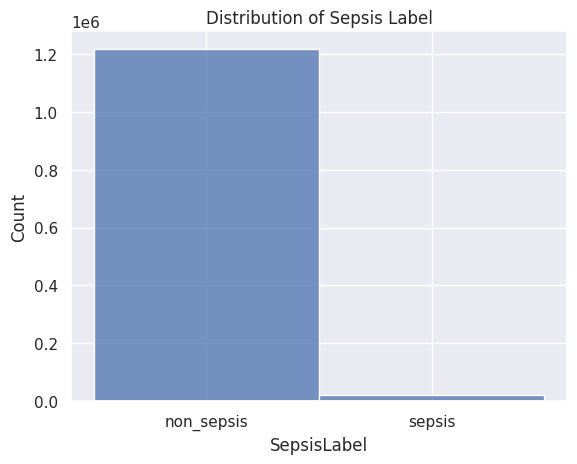

In [ ]:
sns.histplot(data=cleaned_data, x='SepsisLabel', bins=2)
plt.title('Distribution of Sepsis Label')
plt.show()

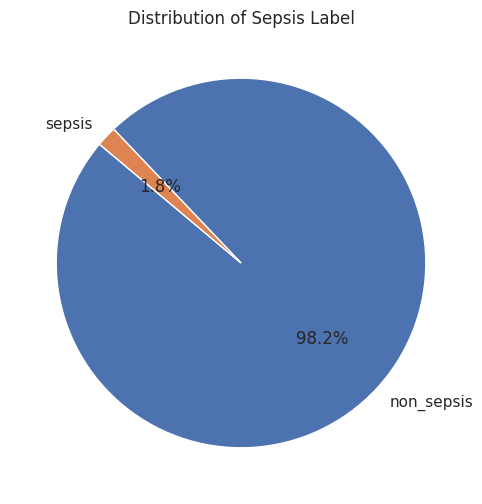

In [ ]:
sepsis_counts = cleaned_data['SepsisLabel'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sepsis Label')
plt.show()

**Insights:**

As illustrated, the dataset exhibits a significant imbalance, with only 1.8% of the data representing sepsis patients. This is attributed to the rarity of sepsis cases in the population under study, which poses challenges for model training and generalization

## Bivariate Analysis

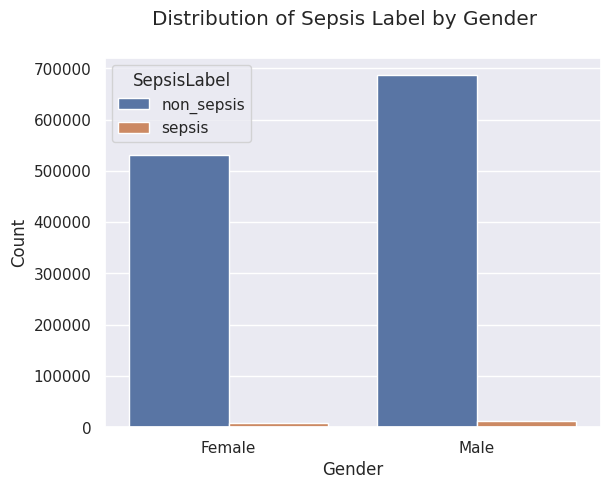

In [ ]:
sns.countplot(x='Gender', data=cleaned_data, hue="SepsisLabel")
plt.suptitle('Distribution of Sepsis Label by Gender')
plt.ylabel('Count')
plt.show()

**Insights:**



*   The count plot displays the frequency of sepsis labels 'SepsisLabel' categorized by gender 'Gender'
*   The plot suggests that males outnumber females in the dataset, with 699,437 instances compared to 540,138 instances, respectively
*   Slightly higher sepsis occurrence among males compared to females



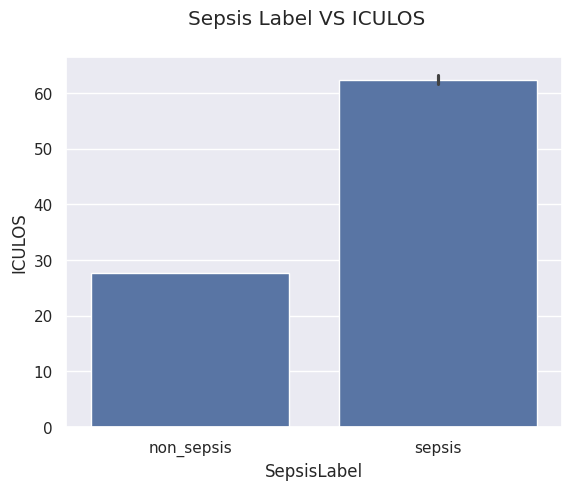

In [ ]:
sns.barplot(cleaned_data, x="SepsisLabel", y='ICULOS')
plt.suptitle('Sepsis Label VS ICULOS')
plt.ylabel('ICULOS')
plt.show()

**Insights:**


*   The bar plot illustrates the distribution of Sepsis Label versus ICULOS (Intensive Care Unit Length of Stay) for both sepsis and non-sepsis patients
*   Non-sepsis patients typically exhibit an ICULOS of around 27 hours since admission to the ICU
*   In contrast, patients diagnosed with sepsis tend to have a significantly longer ICULOS, often exceeding 60 hours
*   The prolonged ICULOS observed in sepsis cases suggests a more complex and protracted course of treatment and monitoring



<ipython-input-29-d5ef186b0f8b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_data, x='Age', y='DBP', palette='coolwarm')


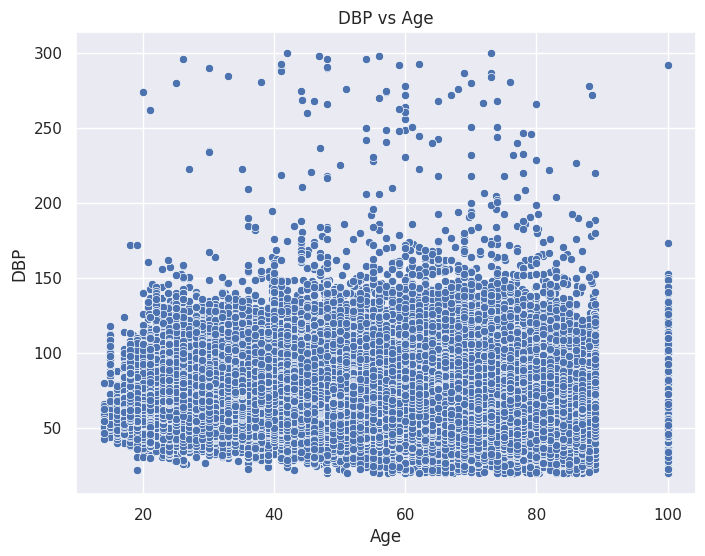

In [ ]:
# Scatter plot of DBP vs Age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='Age', y='DBP', palette='coolwarm')
plt.title('DBP vs Age')
plt.xlabel('Age')
plt.ylabel('DBP')
plt.show()

<ipython-input-32-eb01af8b7281>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_data, x='HR', y='O2Sat', palette='coolwarm')


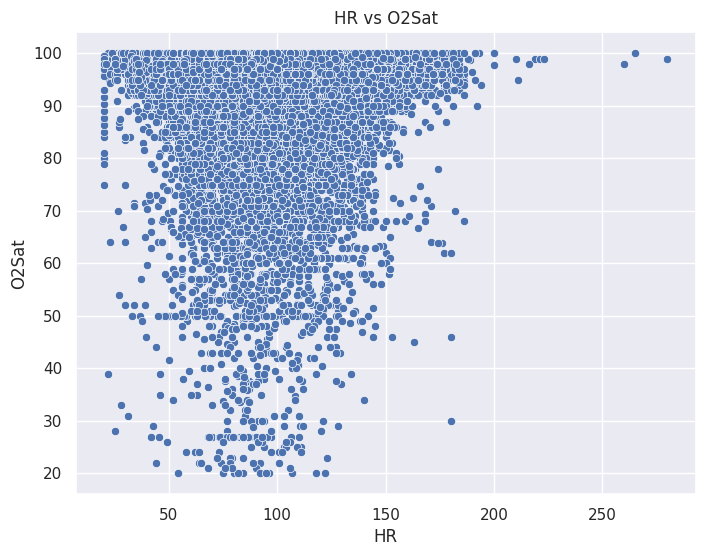

In [ ]:
# Scatter plot of HR vs O2Sat
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='HR', y='O2Sat', palette='coolwarm')
plt.title('HR vs O2Sat')
plt.xlabel('HR')
plt.ylabel('O2Sat')
plt.show()

<ipython-input-33-5a4ecd2aa17f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=cleaned_data, x='Temp', y='SBP', palette='coolwarm')


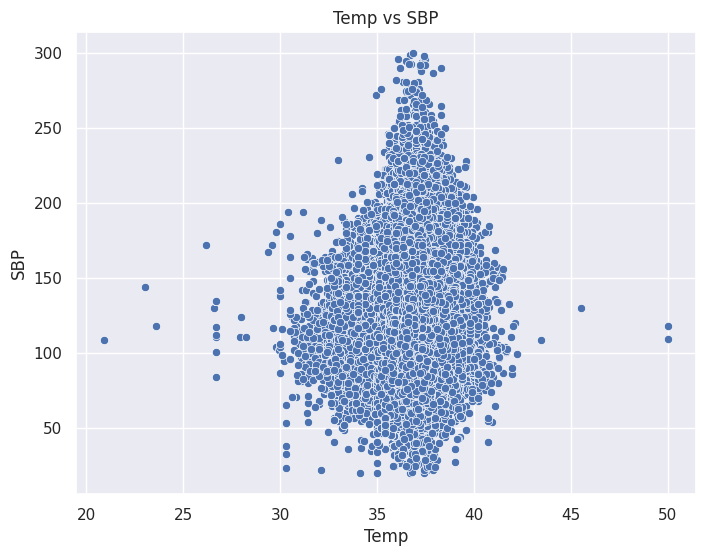

In [ ]:
# Scatter plot of Temp vs SBP
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='Temp', y='SBP', palette='coolwarm')
plt.title('Temp vs SBP')
plt.xlabel('Temp')
plt.ylabel('SBP')
plt.show()

## Multivariate Analysis

In [ ]:
# Pairplot of selected features with the target 'SepsisLabel'
#sns.pairplot(data=cleaned_data, hue='SepsisLabel', diag_kind='kde')
#plt.suptitle('Pairplot of Selected Features with Sepsis Label')
#plt.show()

In [ ]:
cleaned_data['SepsisLabel'].replace('sepsis',1, inplace=True)
cleaned_data['SepsisLabel'].replace('non_sepsis',0, inplace=True)
cleaned_data['Gender'].replace('Male',1, inplace=True)
cleaned_data['Gender'].replace('Female',0, inplace=True)
cleaned_data['SepsisLabel'] = cleaned_data['SepsisLabel'].astype('int')
cleaned_data['Gender'] = cleaned_data['Gender'].astype('int')

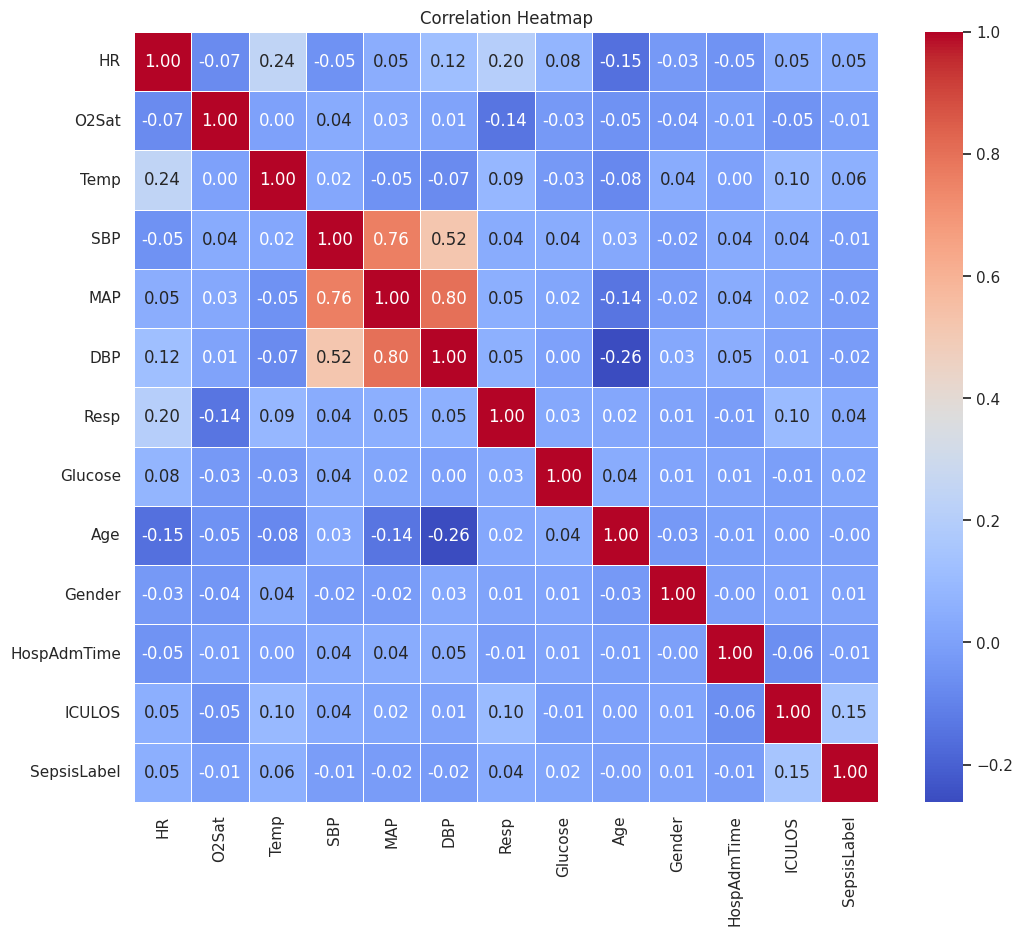

In [ ]:
# Heatmap to visualize correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insights:**



*   Heart Rate (HR): Higher HR with higher temperature and respiration, lower with age due to metabolic demands and cardiac function changes
*   Temperature: Higher temperature raises HR due to increased metabolic demand, slightly lowers blood pressure due to vasodilation
*   Respiration Rate (Resp): Higher resp rates accompany higher HR and longer ICU stays due to increased metabolic demand and severity of illness
*   ICU Length of Stay (ICULOS): Longer stays relate to higher resp rates and presence of sepsis, indicating severity of condition




# **Feature Engineering**

In [ ]:
df = data.copy()

In [ ]:
df.reset_index(drop=True, inplace=True)

To enable modelling, I have made the following changes:


*   Encoding categorical features
*   Scaling the numeric features
*   Split the data into a training set and a test set



### Encoding categorical variables

The target variable was already encoded, and for the categorical feature 'Gender,' a one-hot encoding scheme was employed, expanding it into binary columns.

In [ ]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df['Gender'].values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ['Female','Male'])
df = pd.concat([df,dfOneHot], axis =1)
df = df.drop(["Gender"], axis=1)

In [ ]:
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,HospAdmTime,ICULOS,SepsisLabel,Female,Male
0,61.0,99.0,36.440,124.0,65.0,43.0,17.5,78.0,75.91,-98.6,1,0,1.0,0.0
1,61.0,99.0,36.440,124.0,65.0,43.0,17.5,78.0,75.91,-98.6,2,0,1.0,0.0
2,64.0,98.0,36.385,125.0,64.0,41.0,27.0,78.0,75.91,-98.6,3,0,1.0,0.0
3,56.0,100.0,36.330,123.0,65.0,41.0,9.0,78.0,75.91,-98.6,4,0,1.0,0.0
4,66.0,99.0,36.275,120.0,67.0,43.0,23.0,78.0,75.91,-98.6,5,0,1.0,0.0


In [ ]:
df[df['SepsisLabel'] == 1].head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Glucose,Age,HospAdmTime,ICULOS,SepsisLabel,Female,Male
433,119.0,100.0,37.940,140.0,106.0,85.0,26.5,118.0,27.92,-0.03,249,1,0.0,1.0
434,118.0,96.0,37.665,138.0,108.0,88.0,26.0,117.5,27.92,-0.03,250,1,0.0,1.0
435,111.0,97.0,37.390,136.0,106.0,86.0,26.0,117.0,27.92,-0.03,251,1,0.0,1.0
436,116.0,96.0,37.720,143.0,109.0,88.0,30.0,116.5,27.92,-0.03,252,1,0.0,1.0
437,120.0,97.0,37.720,138.0,106.0,85.0,32.0,116.0,27.92,-0.03,253,1,0.0,1.0


### Scaling the numeric features

In [ ]:
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(df[['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','Glucose','Age','HospAdmTime','ICULOS']])
scaled_data = np.concatenate((scaled_numeric_features, df[['Female','Male','SepsisLabel']]), axis=1)

In [ ]:
scaled_data[1]

array([-1.36596011,  0.59105824, -0.6264657 , -0.01053074, -1.12668879,
       -1.50648702, -0.20697904, -1.23214811,  0.85557191, -0.25386467,
       -0.84816227,  1.        ,  0.        ,  0.        ])

### Splitting Data

In [ ]:
# Split the data into features and target
X = scaled_data[:, :-1]
y = scaled_data[:, -1]

print("Features:")
print(X)
print("\nTarget:")
print(y)

Features:
[[-1.36596011  0.59105824 -0.6264657  ... -0.88038749  1.
   0.        ]
 [-1.36596011  0.59105824 -0.6264657  ... -0.84816227  1.
   0.        ]
 [-1.19226124  0.26350025 -0.70469247 ... -0.81593705  1.
   0.        ]
 ...
 [-0.38166652  0.26350025 -0.47001216 ...  0.1508196   1.
   0.        ]
 [-0.15006802  0.59105824 -0.39889691 ...  0.18304482  1.
   0.        ]
 [-0.26586727 -0.06405773 -0.39889691 ...  0.21527004  1.
   0.        ]]

Target:
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("X_train = ",X_train.shape, "y_train = ", y_train.shape)
print("X_test = ",X_test.shape, "y_test = ", y_test.shape)

X_train =  (991660, 13) y_train =  (991660,)
X_test =  (247915, 13) y_test =  (247915,)


# **Modeling**

## Evaluation

In [ ]:
def evaluate_model(y_true,y_pred,y_pred_proba):
  # Accuracy
  accuracy = accuracy_score(y_true, y_pred)
  print("Accuracy:", accuracy)

  # Precision
  precision = precision_score(y_true, y_pred)
  print("Precision:", precision)

  # Recall
  recall = recall_score(y_true, y_pred)
  print("Recall:", recall)

  # F1 Score
  f1 = f1_score(y_true, y_pred)
  print("F1 Score:", f1)

  # AUC-ROC
  auc_roc = roc_auc_score(y_true, y_pred)
  print("AUC-ROC:", auc_roc)

  # Mean Absolute Error
  mae = mean_absolute_error(y_true, y_pred)
  print("Mean Absolute Error:", mae)

  # Root Mean Squared Error
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", rmse)

  # Classification Report
  print("Classification Report:")
  print(classification_report(y_true, y_pred))

  # Confusion Matrix
  print("Confusion Matrix:")
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', xticklabels= ["non-sepsis", "sepsis"],yticklabels= ["non-sepsis", "sepsis"])
  plt.show()

  # Plot ROC Curve
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  return accuracy, precision, recall, f1, auc_roc, mae, rmse

In [ ]:
def dl_plots(history):
  # plot loss during training
  plt.subplot(211)
  plt.title('Loss')
  plt.plot(history.history['loss'], label='train')
  plt.plot(history.history['val_loss'], label='test')
  plt.legend()
  # plot accuracy during training
  plt.subplot(212)
  plt.title('Accuracy')
  plt.plot(history.history['accuracy'], label='train')
  plt.plot(history.history['val_accuracy'], label='test')
  plt.legend()
  plt.show()


## Random Forest

Accuracy: 0.985733013331182
Precision: 0.9693769799366421
Recall: 0.20741075463172165
F1 Score: 0.3417085427135678
AUC-ROC: 0.6036458263710542
Mean Absolute Error: 0.01426698666881794
Root Mean Squared Error: 0.11944449199865995
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99    243489
         1.0       0.97      0.21      0.34      4426

    accuracy                           0.99    247915
   macro avg       0.98      0.60      0.67    247915
weighted avg       0.99      0.99      0.98    247915

Confusion Matrix:


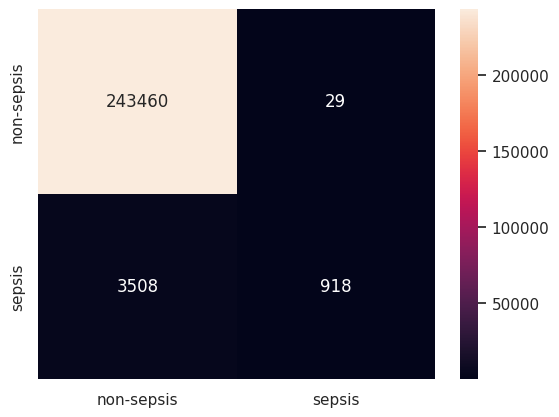

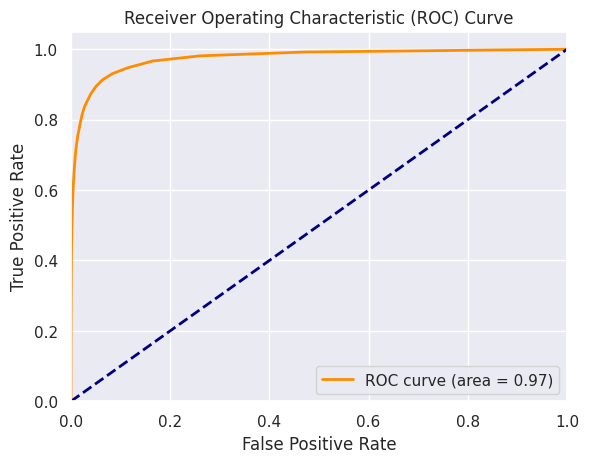

In [ ]:
# Initialize the Random Forest classifier with class weights
rfc = RandomForestClassifier(class_weight = {0:55 , 1: 1} ,random_state = 42)

# Train the classifier
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred_rfc = rfc.predict(X_test)
y_pred_proba_rfc = rfc.predict_proba(X_test)
accuracy_rfc, precision_rfc, recall_rfc, f1_score_rfc, auc_roc_rfc, mae_rfc, rmse_rfc = evaluate_model(y_test,y_pred_rfc,y_pred_proba_rfc[:, 1])

## XGBoost

Accuracy: 0.9703608091482968
Precision: 0.27715070164734595
Recall: 0.4105286940804338
F1 Score: 0.3309051174649426
AUC-ROC: 0.6955329012664858
Mean Absolute Error: 0.029639190851703204
Root Mean Squared Error: 0.17216036376501764
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    243489
         1.0       0.28      0.41      0.33      4426

    accuracy                           0.97    247915
   macro avg       0.63      0.70      0.66    247915
weighted avg       0.98      0.97      0.97    247915

Confusion Matrix:


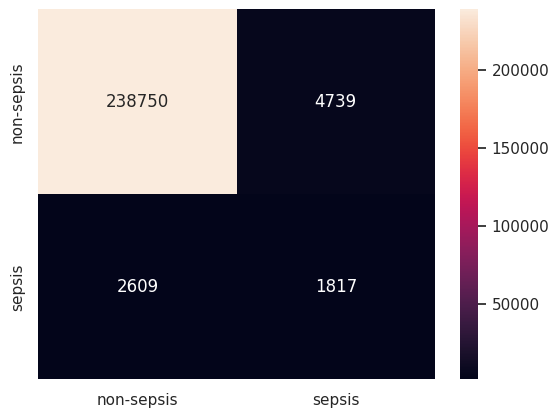

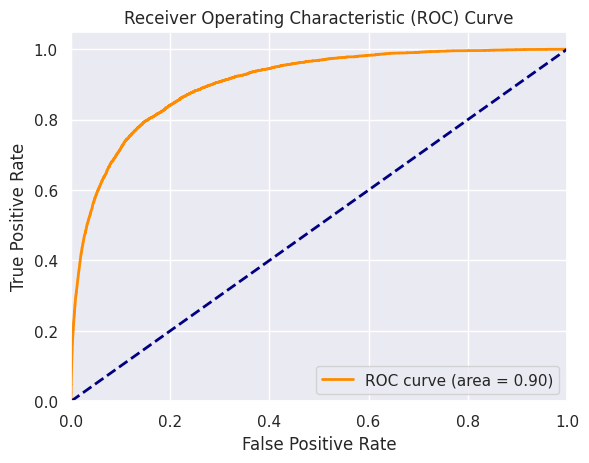

In [ ]:
# Initialize the XGBoost with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=9, objective= 'binary:logistic' ,random_state=42)

# Train the classifier
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = [round(value) for value in y_pred_xgb]
y_pred_proba_xgb = xgb.predict_proba(X_test)
accuracy_xgb, precision_xgb, recall_xgb, f1_score_xgb, auc_roc_xgb, mae_xgb, rmse_xgb = evaluate_model(y_test,y_pred_xgb,y_pred_proba_xgb[:, 1])

## MLP

Epoch 1/10
30990/30990 [==============================] - 96s 3ms/step - loss: 0.3949 - accuracy: 0.9608 - val_loss: 0.1589 - val_accuracy: 0.9651
Epoch 2/10
30990/30990 [==============================] - 93s 3ms/step - loss: 0.3821 - accuracy: 0.9609 - val_loss: 0.1794 - val_accuracy: 0.9543
Epoch 3/10
30990/30990 [==============================] - 98s 3ms/step - loss: 0.3772 - accuracy: 0.9600 - val_loss: 0.1451 - val_accuracy: 0.9608
Epoch 4/10
30990/30990 [==============================] - 91s 3ms/step - loss: 0.3724 - accuracy: 0.9609 - val_loss: 0.1614 - val_accuracy: 0.9633
Epoch 5/10
30990/30990 [==============================] - 95s 3ms/step - loss: 0.3684 - accuracy: 0.9601 - val_loss: 0.1557 - val_accuracy: 0.9572
Epoch 6/10
30990/30990 [==============================] - 89s 3ms/step - loss: 0.3663 - accuracy: 0.9596 - val_loss: 0.1588 - val_accuracy: 0.9581
Epoch 7/10
30990/30990 [==============================] - 92s 3ms/step - loss: 0.3629 - accuracy: 0.9603 - val_loss: 0

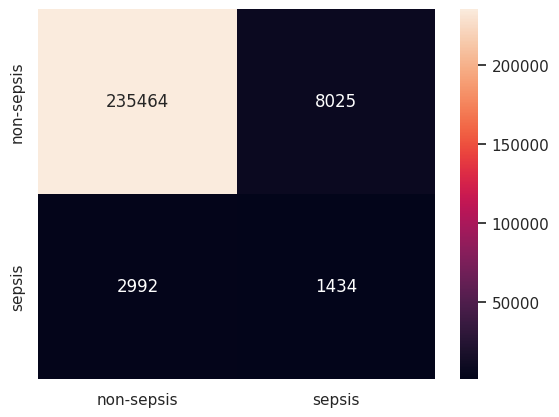

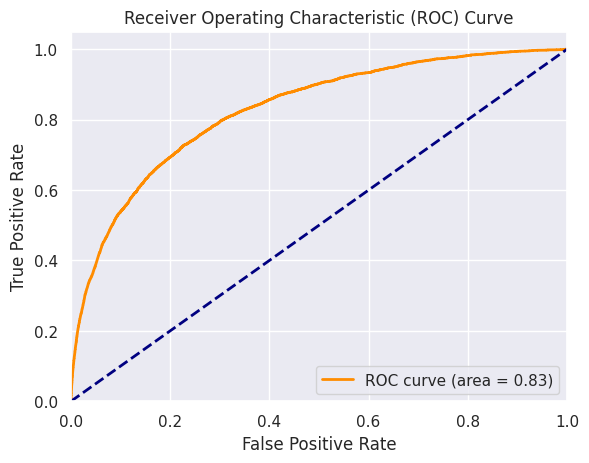

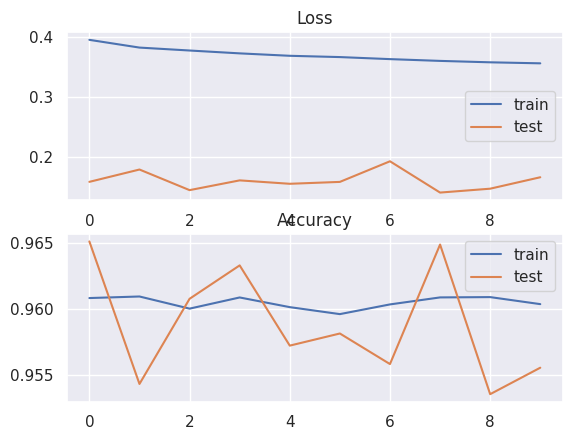

In [ ]:
# Define model
mlp = Sequential()
mlp.add(Dense(100, input_shape=(X_train.shape[1],), activation='relu'))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(32, activation='relu'))
mlp.add(Dense(1, activation='sigmoid'))

# Compile model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
history_mlp = mlp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1, class_weight={0:1.0 , 1: 9.5})

# Make predictions
y_pred_proba_mlp = mlp.predict(X_test)
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)

accuracy_mlp, precision_mlp, recall_mlp, f1_score_mlp, auc_roc_mlp, mae_mlp, rmse_mlp = evaluate_model(y_test,y_pred_mlp,y_pred_proba_mlp)
dl_plots(history_mlp)

## RNN

Epoch 1/10
30990/30990 [==============================] - 746s 24ms/step - loss: 0.4358 - accuracy: 0.9593 - val_loss: 0.1435 - val_accuracy: 0.9738
Epoch 2/10
30990/30990 [==============================] - 768s 25ms/step - loss: 0.4923 - accuracy: 0.9582 - val_loss: 0.1829 - val_accuracy: 0.9515
Epoch 3/10
30990/30990 [==============================] - 775s 25ms/step - loss: 0.4130 - accuracy: 0.9586 - val_loss: 0.1472 - val_accuracy: 0.9627
Epoch 4/10
30990/30990 [==============================] - 776s 25ms/step - loss: 1.0225 - accuracy: 0.9598 - val_loss: 0.1575 - val_accuracy: 0.9682
Epoch 5/10
30990/30990 [==============================] - 769s 25ms/step - loss: 0.4675 - accuracy: 0.9601 - val_loss: 0.1578 - val_accuracy: 0.9619
Epoch 6/10
30990/30990 [==============================] - 775s 25ms/step - loss: 0.3934 - accuracy: 0.9599 - val_loss: 0.1603 - val_accuracy: 0.9584
Epoch 7/10
30990/30990 [==============================] - 771s 25ms/step - loss: 0.5060 - accuracy: 0.9601

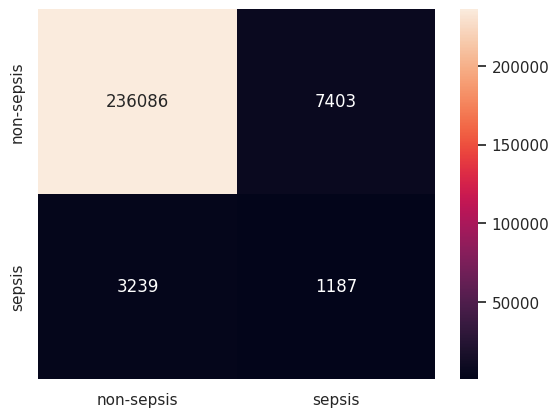

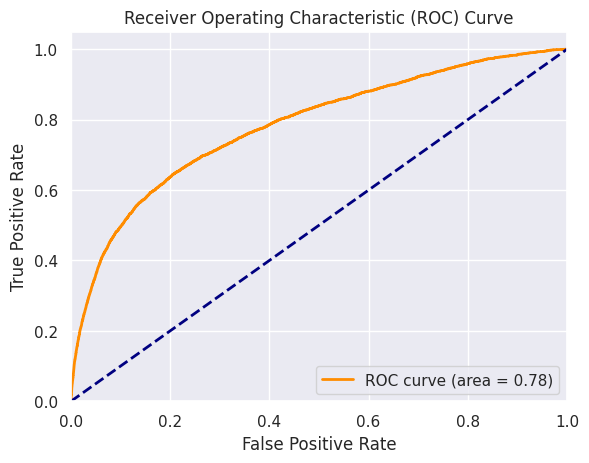

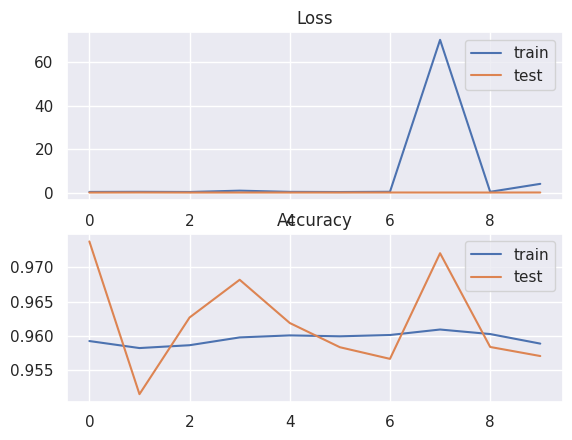

In [ ]:
# Define model
rnn = Sequential()
rnn.add(LSTM(100, input_shape=(X_train.shape[1], 1), return_sequences=True, activation='relu'))
rnn.add(LSTM(64, activation='relu'))
rnn.add(Dense(32, activation='relu'))
rnn.add(Dense(1, activation='sigmoid'))

# Compile model
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
history_rnn = rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=1, class_weight={0:1.0 , 1: 9.5})

# Make predictions
y_pred_proba_rnn= rnn.predict(X_test)
y_pred_rnn = (y_pred_proba_rnn > 0.5).astype(int)

accuracy_rnn, precision_rnn, recall_rnn, f1_score_rnn, auc_roc_rnn, mae_rnn, rmse_rnn = evaluate_model(y_test,y_pred_rnn,y_pred_proba_rnn)
dl_plots(history_rnn)

# **Compare Models**

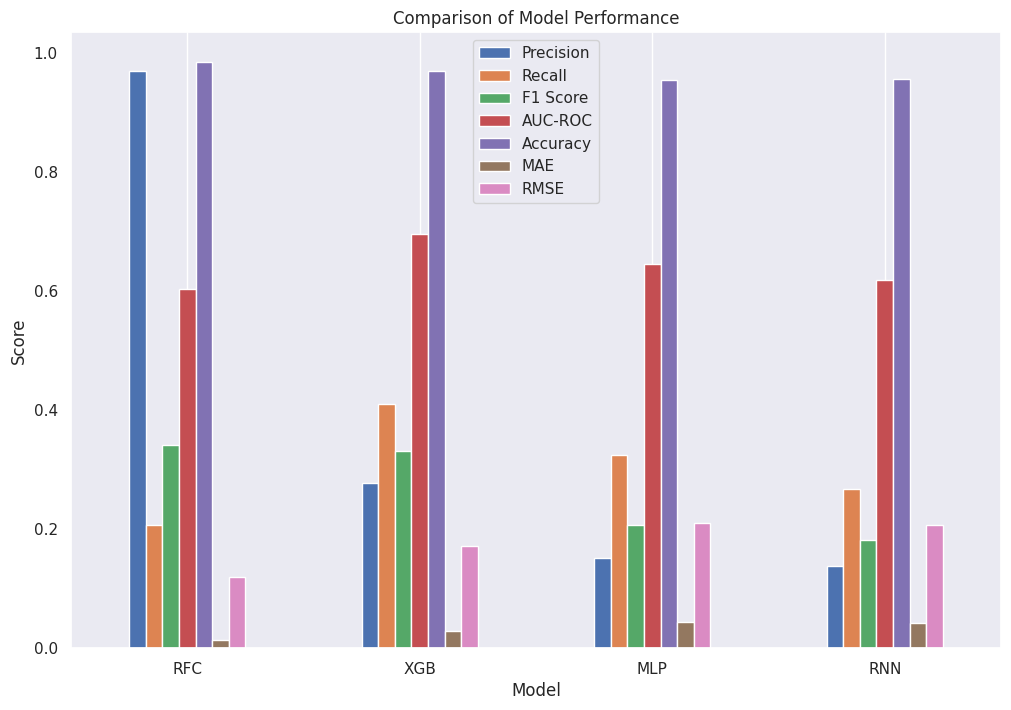

In [ ]:
# Metrics for each model
metrics_data = {
    'Model': ['RFC', 'XGB', 'MLP', 'RNN'],
    'Precision': [precision_rfc, precision_xgb, precision_mlp, precision_rnn],
    'Recall': [recall_rfc, recall_xgb, recall_mlp, recall_rnn],
    'F1 Score': [f1_score_rfc, f1_score_xgb, f1_score_mlp, f1_score_rnn],
    'AUC-ROC': [auc_roc_rfc, auc_roc_xgb, auc_roc_mlp, auc_roc_rnn],
    'Accuracy': [accuracy_rfc, accuracy_xgb, accuracy_mlp, accuracy_rnn],
    'MAE': [mae_rfc, mae_xgb, mae_mlp, mae_rnn],
    'RMSE': [rmse_rfc, rmse_xgb, rmse_mlp, rmse_rnn]
}

# Create a DataFrame from the metrics data
metrics_df = pd.DataFrame(metrics_data)

# Set the model column as index
metrics_df.set_index('Model', inplace=True)

# Plotting
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='best')
plt.show()


We observe that all models exhibit perfect accuracy, indicating their ability to correctly predict the non-sepsis class. This is because of the  larger number of non-sepsis samples compared to sepsis samples. Additionally, across all models, other metrics appear weak except for precision in the random forest model

In [ ]:
# Display statistics for numeric columns
metrics_df.T.style.format("{:.3f}").background_gradient(cmap="RdBu_r")

Model,RFC,XGB,MLP,RNN
Precision,0.969,0.277,0.152,0.138
Recall,0.207,0.411,0.324,0.268
F1 Score,0.342,0.331,0.207,0.182
AUC-ROC,0.604,0.696,0.646,0.619
Accuracy,0.986,0.970,0.956,0.957
MAE,0.014,0.030,0.044,0.043
RMSE,0.119,0.172,0.211,0.207


The Random Forest model and XGBoost demonstrate good performance compared to the others, but we will choose the Random Forest model as the optimal choice in this scenario due to its higher precision (96.9%) and F1 score (34.2%) compared to the other models.

# **Deployment**

For deployment, we will train the Random Forest model on the entire dataset without testing, and save the trained model to a .pkl file

In [ ]:
# Initialize the Random Forest classifier with class weights
#rfc_pkl = RandomForestClassifier(class_weight = {0:55 , 1: 1} ,random_state = 42)

# Train the classifier
#rfc_pkl.fit(X, y)

# Save the trained model to a .pkl file
#with open('/content/gdrive/MyDrive/.../random_forest_classifier.pkl', 'wb') as f:
#    pickle.dump(rfc_pkl, f)

This is a simple interface using the Gradio package to ensure that the app functions correctly

In [ ]:
import gradio as gr
import numpy as np
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model
rfc_pkl = joblib.load('/content/gdrive/MyDrive/.../random_forest_classifier.pkl')


# Define prediction function
def predict(HR, O2Sat, Temp, SBP, MAP, DBP, Resp, Glucose, Age, Gender, HospAdmTime, ICULOS):
    # One-hot encode gender
    gender_female = 1 if Gender == "female" else 0
    gender_male = 1 if Gender == "male" else 0

    # Create inputs for each classifier
    inputs_array = np.array([float(HR), float(O2Sat), float(Temp), float(SBP), float(MAP), float(DBP), float(Resp), float(Glucose), float(Age), float(HospAdmTime), float(ICULOS), gender_female, gender_male])

    # Standardize numeric features
    df = pd.DataFrame(inputs_array[:-2], columns=['Original'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Concatenate scaled data with the last two values
    final_data = np.concatenate((scaled_data, inputs_array[-2:].reshape(2, 1)), axis=0).reshape(1, -1)

    # Make predictions using the trained classifier
    probability = rfc_pkl.predict_proba(final_data)[0]

    # Adjusting the weight for sepsis
    weight_factor = 0.5 / 0.15

    # Adjusting probabilities
    non_sepsis_prob = probability[0]
    sepsis_prob = probability[1] * weight_factor

    # Normalizing probabilities
    total_prob = non_sepsis_prob + sepsis_prob
    normalized_non_sepsis_prob = non_sepsis_prob / total_prob
    normalized_sepsis_prob = sepsis_prob / total_prob

    results = {
        'Non-Sepsis': normalized_non_sepsis_prob,
        'Sepsis': normalized_sepsis_prob
    }


    return results

# Create Gradio interface
gr.Interface(fn=predict, inputs=["number", "number", "number", "number", "number", "number", "number", "number", "number", "text", "number", "number"], outputs="label", title="Healthcare Sepsis Predictor").launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://be398af1050ee4606a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


{'Non-Sepsis': 1.0, 'Sepsis': 0.0}
{'Non-Sepsis': 0.6675191815856778, 'Sepsis': 0.3324808184143223}
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://be398af1050ee4606a.gradio.live
